In [30]:
#import-import sek
# %pip install pandas
# %pip install numpy
# %pip install scipy

import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

In [31]:
data_path = 'weather.csv' 
data = pd.read_csv(data_path)

In [37]:
def cari_persentil(data_terurut, persentil):
    k = (len(data_terurut) - 1) * (persentil / 100)
    f = int(k)
    c = f + 1 if k - f > 0 else f
    if f < len(data_terurut) - 1:
        return data_terurut[f] + (k - f) * (data_terurut[c] - data_terurut[f])
    else:
        return data_terurut[f]

def statistik_manual(data):
    hasil = {}
    for kolom in data.select_dtypes(include=['number']).columns:
        nilai = data[kolom].dropna()
        data_terurut = sorted(nilai)
        n = len(data_terurut)
        
        mean = sum(data_terurut) / n
        median = cari_persentil(data_terurut, 50)
        modus = max(data_terurut, key=data_terurut.count) if data_terurut else None
        variansi = sum((x - mean) ** 2 for x in data_terurut) / (n - 1)
        standar_deviasi = variansi ** 0.5
        nilai_minimum = data_terurut[0]
        nilai_maksimum = data_terurut[-1]
        range = nilai_maksimum - nilai_minimum
        kuartil_1 = cari_persentil(data_terurut, 25)
        kuartil_3 = cari_persentil(data_terurut, 75)
        IQR = kuartil_3 - kuartil_1
        skewness_value = (sum((x - mean) ** 3 for x in data_terurut) / n) / (standar_deviasi ** 3) if standar_deviasi else 0
        kurtosis_value = (sum((x - mean) ** 4 for x in data_terurut) / n) / (standar_deviasi ** 4) - 3 if standar_deviasi else -3

        hasil[kolom] = {
            'nilai mean': mean,
            'nilai median': median,
            'nilai modus': modus,
            'nilai standar deviasi': standar_deviasi,
            'nilai variansi': variansi,
            'nilai range': range,
            'nilai minimum': nilai_minimum,
            'nilai maksimum': nilai_maksimum,
            'kuartil 1': kuartil_1,
            'kuartil 3': kuartil_3,
            'nilai IQR': IQR,
            'nilai skewness': skewness_value,
            'nilai kurtosis': kurtosis_value
        }
    return pd.DataFrame(hasil)


#testing sek, tapi angkane masih aneh, hmmm
statistik_numerik_manual = statistik_manual(data)
statistik_numerik_manual

,Unnamed: 0,Temperature,Humidity,Precipitation,Wind_Speed,Cloud_Coverage,Pressure,UV_Index,Air_Quality,Visibility
nilai mean,999.500000,24.940225,70.110113,9.922872,14.929117,49.856025,1000.691301,5.464730,65.757886,15.091752
nilai median,999.500000,24.937000,69.871791,9.908852,14.890523,49.990347,1000.998439,5.326224,65.731600,15.204045
nilai modus,0.000000,15.441317,40.991391,-9.480835,-4.063694,13.241983,800.000000,1.002470,35.829769,-2.190009
nilai standar deviasi,577.494589,3.003306,9.807775,5.031691,4.972098,10.134826,57.329860,2.588364,8.365777,4.985096
nilai variansi,333500.000000,9.019848,96.192459,25.317914,24.721761,102.714693,3286.712794,6.699627,69.986219,24.851185
nilai range,1999.000000,19.618748,63.681598,36.332813,33.785534,79.328094,400.000000,8.996460,59.227663,37.190009
nilai minimum,0.000000,15.441317,40.991391,-9.480835,-4.063694,13.241983,800.000000,1.002470,35.829769,-2.190009
nilai maksimum,1999.000000,35.060065,104.672989,26.851977,29.721840,92.570077,1200.000000,9.998930,95.057432,35.000000
kuartil 1,499.750000,22.919216,63.313635,6.695718,11.499557,43.127973,952.131330,3.316950,60.242220,11.773017
kuartil 3,1499.250000,26.986035,76.744302,13.248399,18.242726,56.208254,1050.702280,7.677455,71.074361,18.428237


In [38]:
#ini buat perbandingan
def statistik_library(data):
    hasil = {}
    for kolom in data.select_dtypes(include=['number']).columns:
        nilai_kolom = data[kolom].dropna()
        mean = np.mean(nilai_kolom)
        median = np.median(nilai_kolom)
        modus = pd.Series(nilai_kolom.mode().values)
        standar_deviasi = np.std(nilai_kolom, ddof=1)
        variansi = np.var(nilai_kolom, ddof=1)
        nilai_minimum, nilai_maksimum = np.min(nilai_kolom), np.max(nilai_kolom)
        range = nilai_maksimum - nilai_minimum
        kuartil_1, kuartil_3 = np.percentile(nilai_kolom, [25, 75])
        IQR = kuartil_3 - kuartil_1
        skewness_value = skew(nilai_kolom)
        kurtosis_value = kurtosis(nilai_kolom)

        hasil[kolom] = {
            'nilai mean': mean,
            'nilai median': median,
            'nilai modus': modus[0] if not modus.empty else np.nan,
            'nilai standar deviasi': standar_deviasi,
            'nilai variansi': variansi,
            'nilai range': range,
            'nilai minimum': nilai_minimum,
            'nilai maksimum': nilai_maksimum,
            'kuartil 1': kuartil_1,
            'kuartil 3': kuartil_3,
            'nilai IQR': IQR,
            'nilai skewness': skewness_value,
            'nilai kurtosis': kurtosis_value
        }
    return pd.DataFrame(hasil)

statistik_numerik_library = statistik_library(data)
statistik_numerik_library

,Unnamed: 0,Temperature,Humidity,Precipitation,Wind_Speed,Cloud_Coverage,Pressure,UV_Index,Air_Quality,Visibility
nilai mean,999.500000,24.940225,70.110113,9.922872,14.929117,49.856025,1000.691301,5.464730,65.757886,15.091752
nilai median,999.500000,24.937000,69.871791,9.908852,14.890523,49.990347,1000.998439,5.326224,65.731600,15.204045
nilai modus,0.000000,15.441317,40.991391,-9.480835,-4.063694,13.241983,800.000000,1.002470,35.829769,-2.190009
nilai standar deviasi,577.494589,3.003306,9.807775,5.031691,4.972098,10.134826,57.329860,2.588364,8.365777,4.985096
nilai variansi,333500.000000,9.019848,96.192459,25.317914,24.721761,102.714693,3286.712794,6.699627,69.986219,24.851185
nilai range,1999.000000,19.618748,63.681598,36.332813,33.785534,79.328094,400.000000,8.996460,59.227663,37.190009
nilai minimum,0.000000,15.441317,40.991391,-9.480835,-4.063694,13.241983,800.000000,1.002470,35.829769,-2.190009
nilai maksimum,1999.000000,35.060065,104.672989,26.851977,29.721840,92.570077,1200.000000,9.998930,95.057432,35.000000
kuartil 1,499.750000,22.919216,63.313635,6.695718,11.499557,43.127973,952.131330,3.316950,60.242220,11.773017
kuartil 3,1499.250000,26.986035,76.744302,13.248399,18.242726,56.208254,1050.702280,7.677455,71.074361,18.428237


In [39]:
#masih agak ragu sama bagian ini
def statistik_string(data):
    hasil = {}
    for kolom in data.select_dtypes(include=['object']).columns:
        counts = data[kolom].value_counts()
        total = counts.sum()
        proportions = counts / total
        hasil[kolom] = {
            'nilai unik': counts.index.tolist(),
            'jumlah': counts.tolist(),
            'proporsi': proportions.tolist()
        }
    return hasil

statistik_string = statistik_string(data)

print("\nStatistik untuk Kolom String:")
for kolom, stats in statistik_string.items():
    print(f"Kolom: {kolom}")
    print("Nilai Unik:", stats['nilai unik'])
    print("Jumlah:", stats['jumlah'])
    print("Proporsi:", stats['proporsi'])
    print("\n")


Statistik untuk Kolom String:
Kolom: Weather_Type
Nilai Unik: ['Sunny', 'Cloudy', 'Rainy', 'Foggy', 'Windy']
Jumlah: [1170, 635, 193, 1, 1]
Proporsi: [0.585, 0.3175, 0.0965, 0.0005, 0.0005]


Kolom: Wind_Direction
Nilai Unik: ['North', 'South', 'West', 'East']
Jumlah: [518, 502, 496, 484]
Proporsi: [0.259, 0.251, 0.248, 0.242]




In [43]:
#Komparasi Numeric
print("Perbandingan Statistik Numerik:")
perbandingan = pd.concat([statistik_numerik_manual.rename(lambda x: f"Manual_{x}", axis='columns'),
                          statistik_numerik_library.rename(lambda x: f"Library_{x}", axis='columns')], axis=1)
#print(perbandingan)

Perbandingan Statistik Numerik:
                       Manual_Unnamed: 0  Manual_Temperature  Manual_Humidity  \
nilai mean                    999.500000           24.940225        70.110113   
nilai median                  999.500000           24.937000        69.871791   
nilai modus                     0.000000           15.441317        40.991391   
nilai standar deviasi         577.494589            3.003306         9.807775   
nilai variansi             333500.000000            9.019848        96.192459   
nilai range                  1999.000000           19.618748        63.681598   
nilai minimum                   0.000000           15.441317        40.991391   
nilai maksimum               1999.000000           35.060065       104.672989   
kuartil 1                     499.750000           22.919216        63.313635   
kuartil 3                    1499.250000           26.986035        76.744302   
nilai IQR                     999.500000            4.066819        13.430668

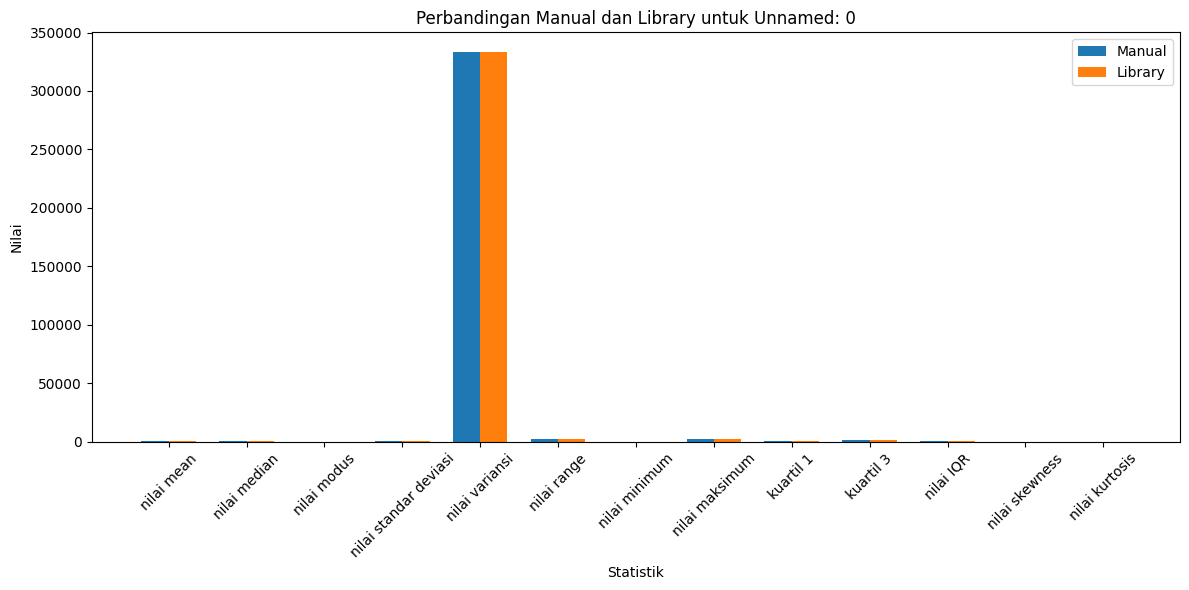

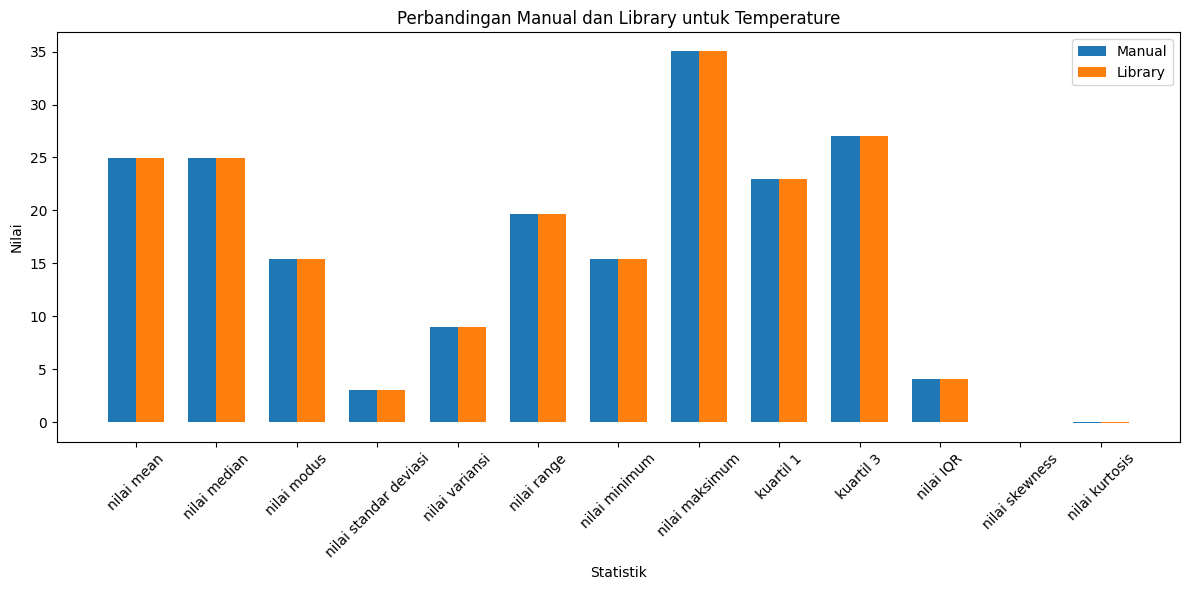

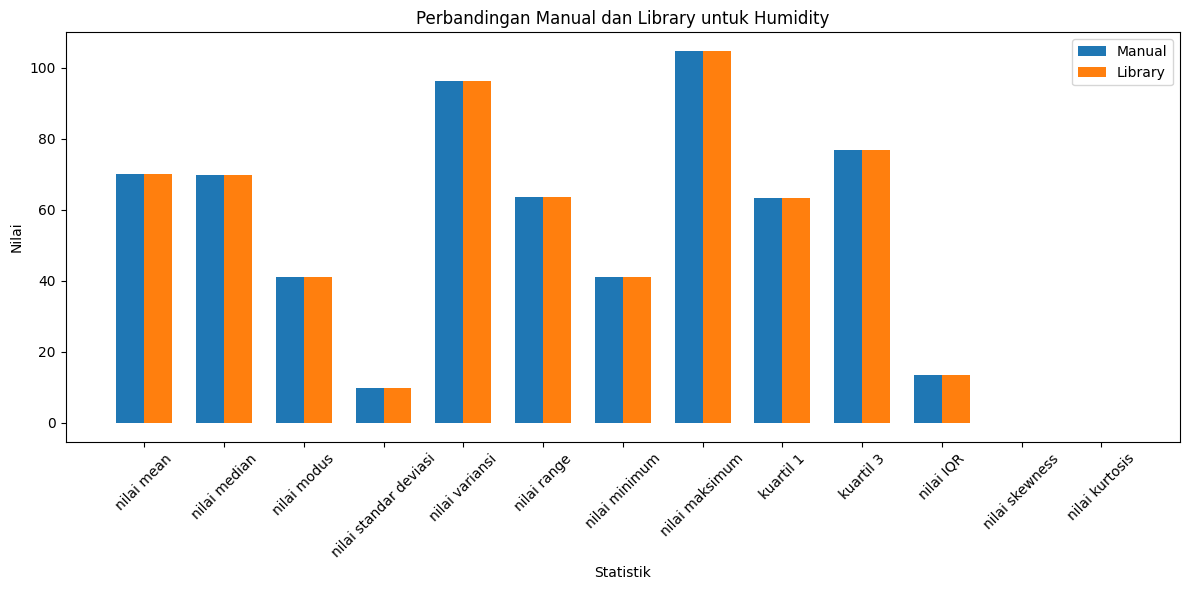

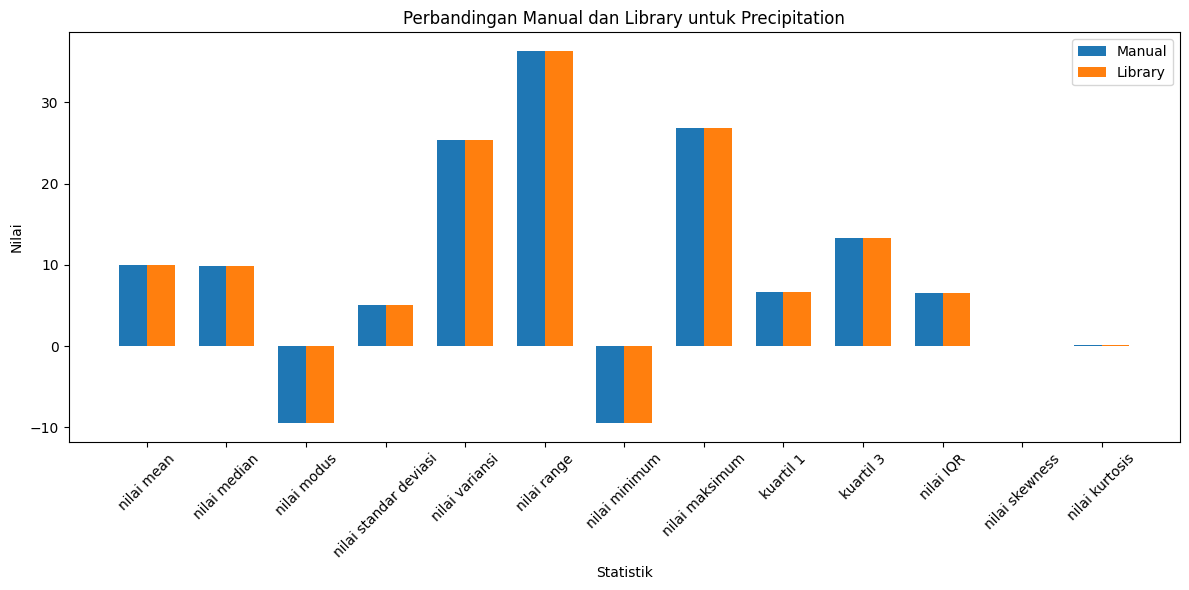

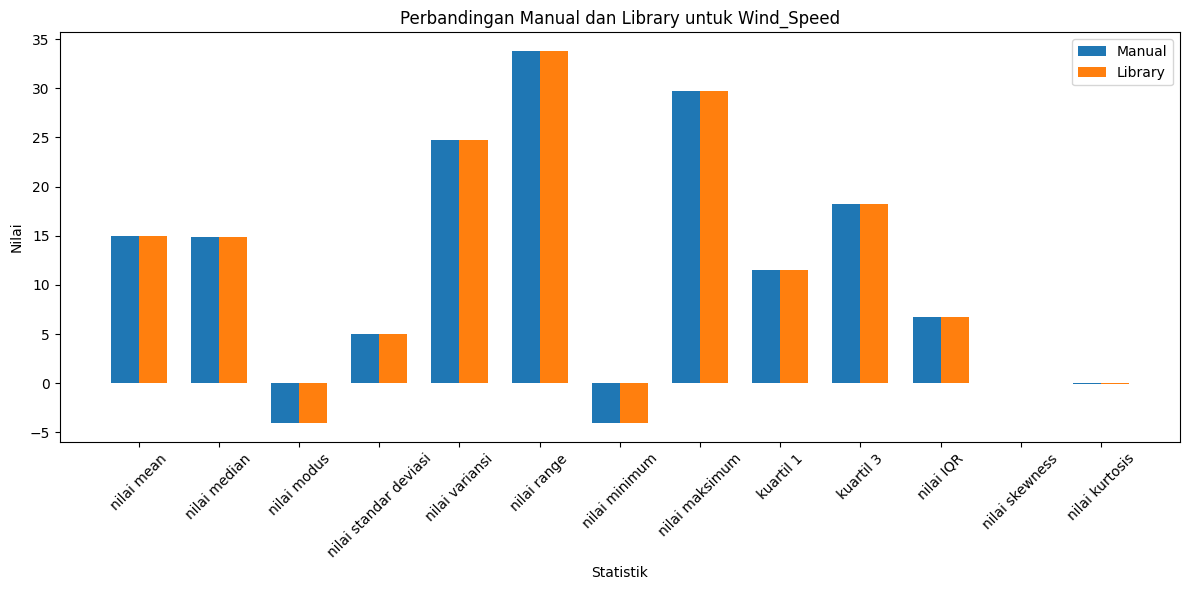

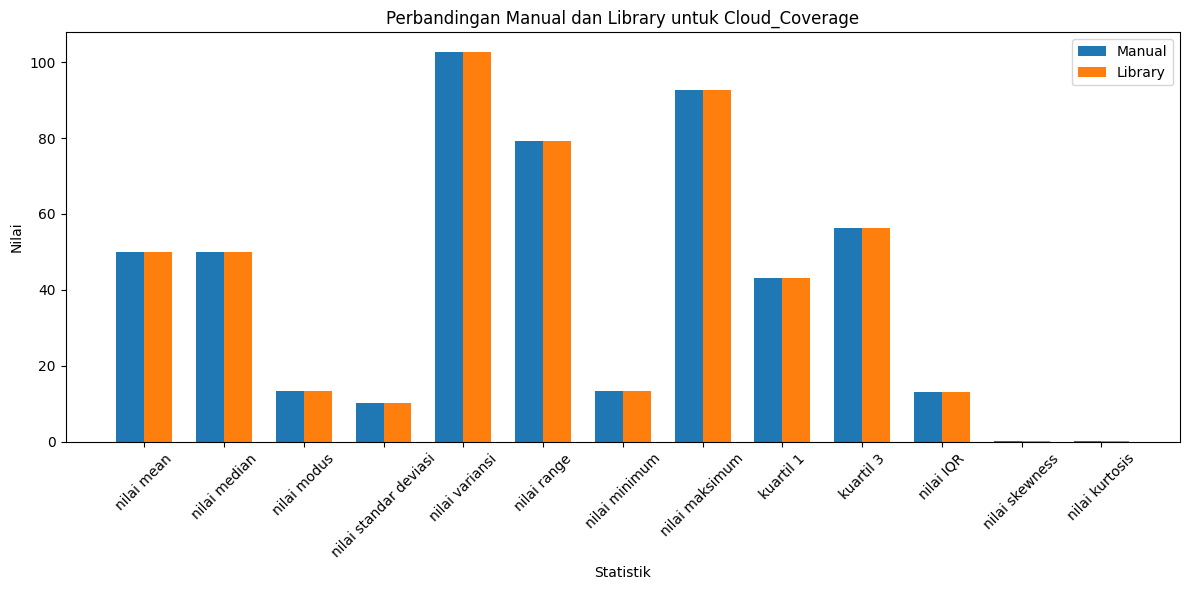

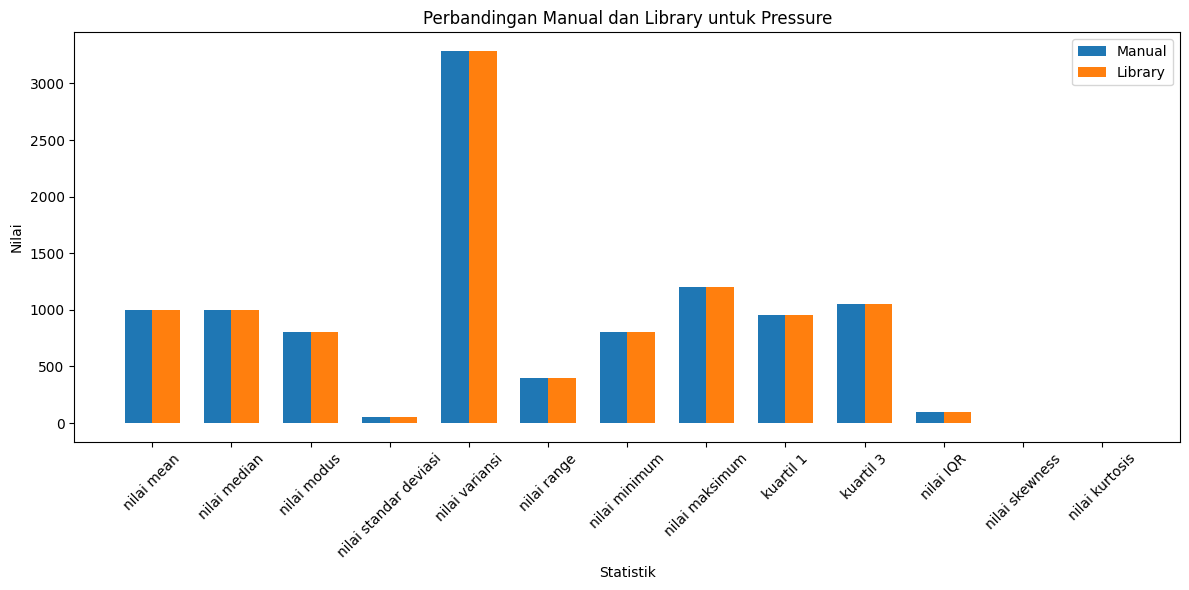

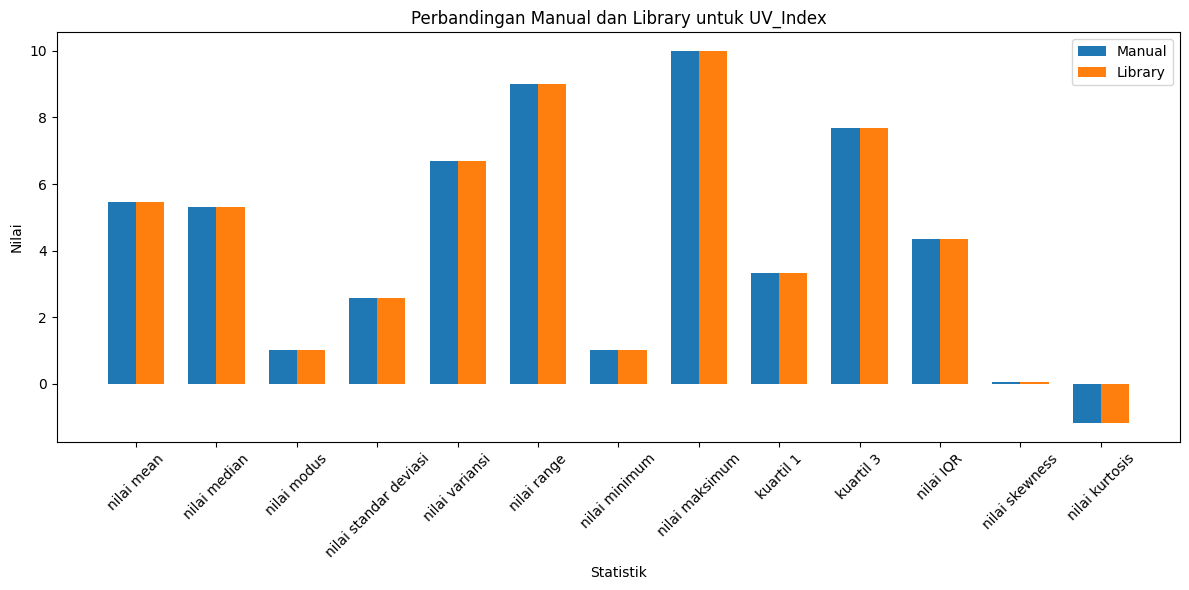

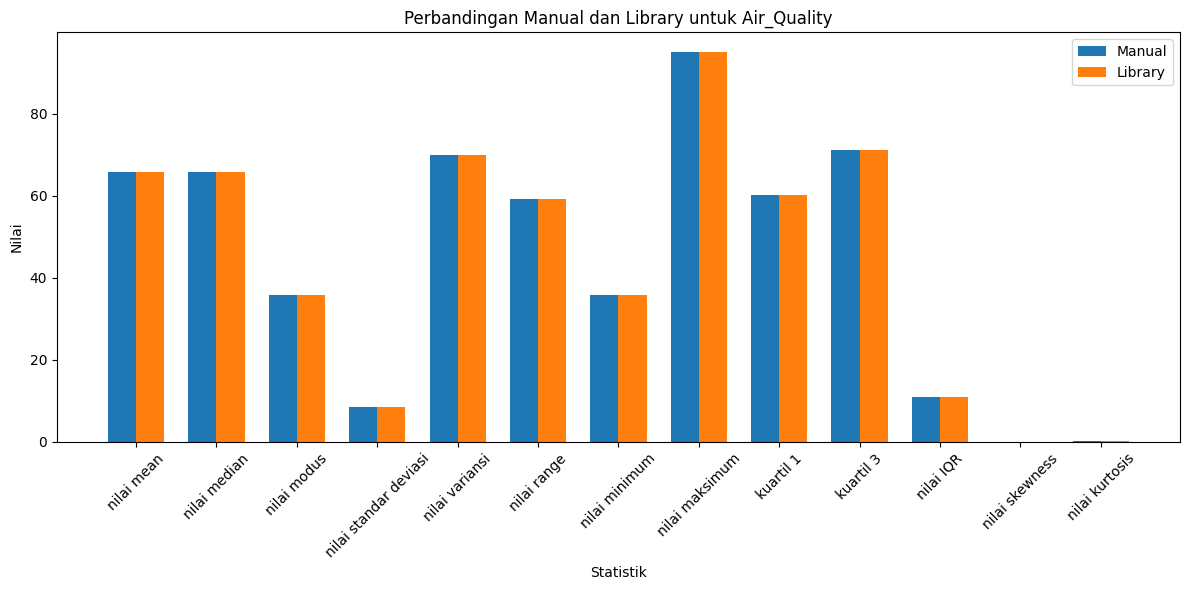

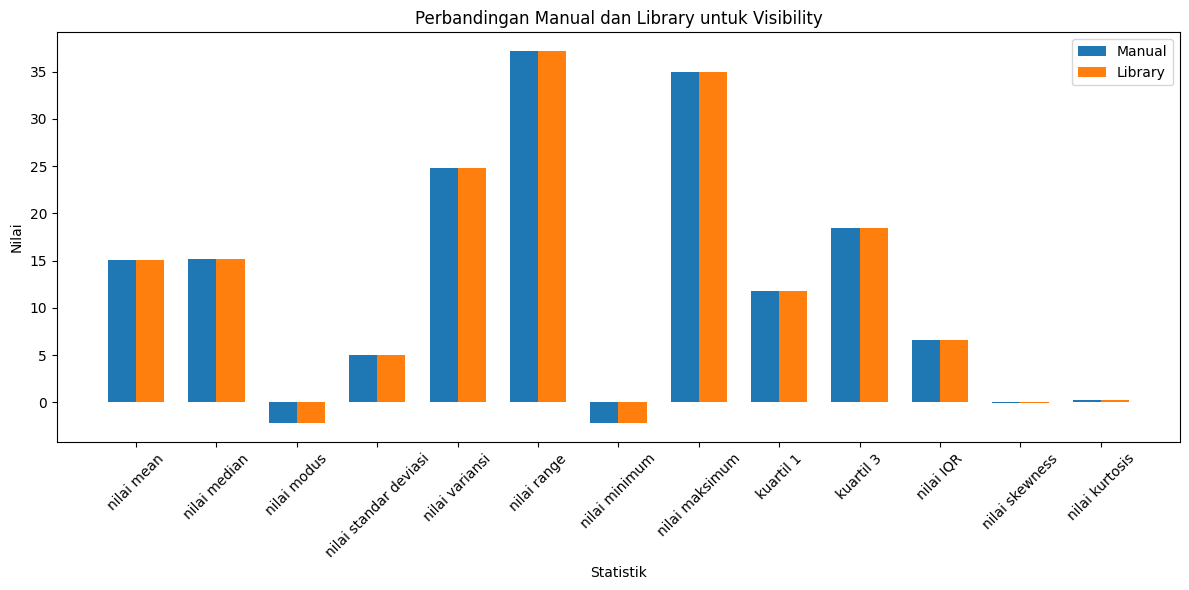

In [49]:
#visualisasi
#%pip install matplotlib

import matplotlib.pyplot as plt

for kolom in statistik_numerik_manual.columns:
    plt.figure(figsize=(12, 6))
    manual_values = statistik_numerik_manual[kolom]
    library_values = statistik_numerik_library[kolom]
    index = np.arange(len(manual_values))
    
    bar_width = 0.35
    plt.bar(index, manual_values, bar_width, label='Manual')
    plt.bar(index + bar_width, library_values, bar_width, label='Library')

    plt.xlabel('Statistik')
    plt.ylabel('Nilai')
    plt.title(f'Perbandingan Manual dan Library untuk {kolom}')
    plt.xticks(index + bar_width / 2, statistik_numerik_manual.index, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()